In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
! mkdir database
! mkdir database/ascii
! tar xzf drive/MyDrive/ocr/database/ascii.tgz -C database/ascii

! mkdir database/forms
! tar xzf drive/MyDrive/ocr/database/formsA-D.tgz -C database/forms
! tar xzf drive/MyDrive/ocr/database/formsE-H.tgz -C database/forms
! tar xzf drive/MyDrive/ocr/database/formsI-Z.tgz -C database/forms

! mkdir database/words
! tar xzf drive/MyDrive/ocr/database/words.tgz -C database/words
! mkdir database/lines
! tar xzf drive/MyDrive/ocr/database/lines.tgz -C database/lines
! mkdir database/xml
! tar xzf drive/MyDrive/ocr/database/xml.tgz -C database/xml

! cp drive/MyDrive/ocr/src/importation.py importation.py

In [10]:
!pip install python-doctr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 205 kB 4.0 MB/s 
     |████████████████████████████████| 604 kB 44.2 MB/s 
     |████████████████████████████████| 1.6 MB 54.4 MB/s 
     |████████████████████████████████| 88 kB 8.1 MB/s 
     |████████████████████████████████| 3.1 MB 43.5 MB/s 
     |████████████████████████████████| 120 kB 60.4 MB/s 
     |████████████████████████████████| 365 kB 45.2 MB/s 
     |████████████████████████████████| 2.8 MB 53.1 MB/s 
     |████████████████████████████████| 235 kB 70.7 MB/s 
     |████████████████████████████████| 104 kB 77.4 MB/s 
     |████████████████████████████████| 45 kB 4.6 MB/s 
     |████████████████████████████████| 88 kB 9.1 MB/s 
     |████████████████████████████████| 2.0 MB 49.6 MB/s 
  Created wheel for mplcursors: filename=mplcursors-0.5.1-py3-none-any.whl size=20820 sha256=6b9fc204e361dc68609b6b4d4ca8b3b972be19633116d9bd90c5e571d0c1f

In [1]:
!sudo apt-get install fonts-freefont-ttf -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-freefont-ttf
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 4,202 kB of archives.
After this operation, 10.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 fonts-freefont-ttf all 20120503-7 [4,202 kB]
Fetched 4,202 kB in 1s (4,306 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to fronten

In [2]:
! pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 4.0 MB/s 


In [3]:
from importation import Importation
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Importation des données

In [4]:
imp = Importation('database')
lines  = imp.get_lines()
forms  = imp.get_forms()
words  = imp.get_words()
print(lines.info())
lines.head()
print(words.info())
words.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11344 entries, 0 to 11343
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   line_id               11344 non-null  object
 1   result_w_seg          11344 non-null  object
 2   greylevel             11344 non-null  object
 3   number_of_components  11344 non-null  object
 4   x                     11344 non-null  object
 5   y                     11344 non-null  object
 6   w                     11344 non-null  object
 7   h                     11344 non-null  object
 8   label                 11344 non-null  object
 9   file                  11344 non-null  object
 10  form_id               11344 non-null  object
 11  writer_id             11344 non-null  object
dtypes: object(12)
memory usage: 1.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 96454 entries, 0 to 96453
Data columns (total 13 columns):
 #   Column           Non-Null Count

,word_id,result_w_seg,greylevel,x,y,w,h,grammatical_tag,label,file,form_id,writer_id,word_size
0,a01-000u-00-00,ok,154,408,768,27,51,AT,A,database/words/a01/a01-000u/a01-000u-00-00.png,a01-000u,000,1
1,a01-000u-00-01,ok,154,507,766,213,48,NN,MOVE,database/words/a01/a01-000u/a01-000u-00-01.png,a01-000u,000,4
2,a01-000u-00-02,ok,154,796,764,70,50,TO,to,database/words/a01/a01-000u/a01-000u-00-02.png,a01-000u,000,2
3,a01-000u-00-03,ok,154,919,757,166,78,VB,stop,database/words/a01/a01-000u/a01-000u-00-03.png,a01-000u,000,4
4,a01-000u-00-04,ok,154,1185,754,126,61,NPT,Mr.,database/words/a01/a01-000u/a01-000u-00-04.png,a01-000u,000,3


# Chargement des images

In [5]:
X = []
import cv2
import numpy as np

for file in forms['file'][0:100]:
    image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    X.append(np.array(image))

Y=[]

for file_ in lines['file'][0:100]:
    image = cv2.imread(file_, cv2.IMREAD_GRAYSCALE)
    Y.append(np.array(image))


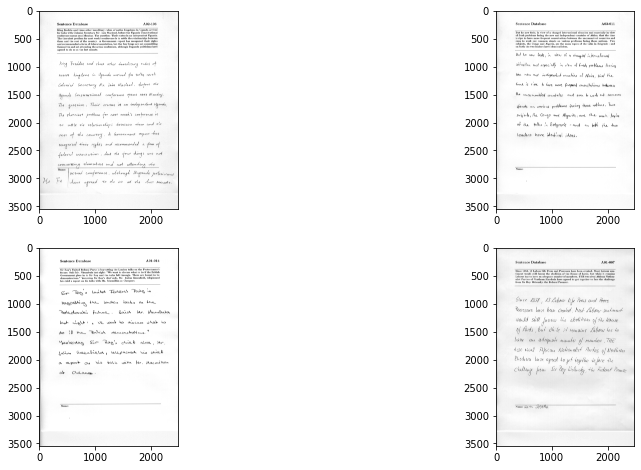

In [6]:
plt.figure(figsize = (15, 8))

j = 1

for i in np.random.choice(len(X), size = 4):
  plt.subplot(2, 2, j)
  plt.imshow(X[i], cmap='gray')
  j = 1 + j


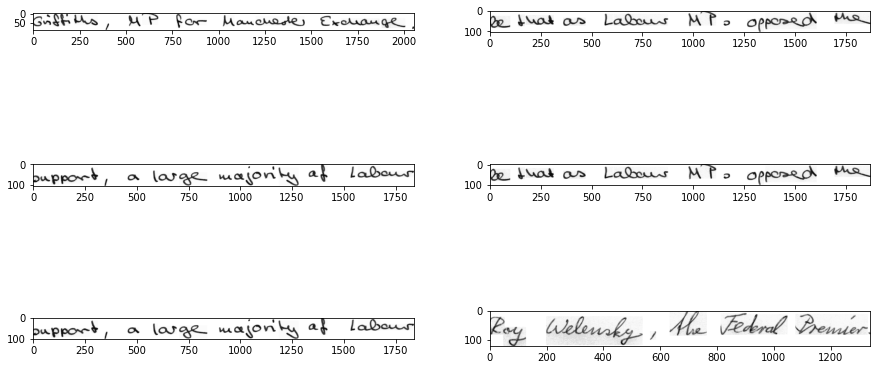

In [7]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize = (15, 8))

j = 1

for i in np.random.choice(len(Y), size = 6):
  plt.subplot(3, 2, j)
  plt.imshow(Y[i], cmap='gray')
  j = 1 + j

In [ ]:
#DOC TR : https://medium.com/quantrium-tech/text-extraction-using-doctr-ocr-471e417764d5

In [8]:
from doctr.io import DocumentFile
#help(DocumentFile)

  0%|          | 0/94178964 [00:00<?, ?it/s]

DEBUG:tensorflow:Layer lstm will use cuDNN kernels when running on GPU.
DEBUG:tensorflow:Layer lstm_1 will use cuDNN kernels when running on GPU.


  0%|          | 0/213937271 [00:00<?, ?it/s]

DEBUG:tensorflow:Layer lstm_2 will use cuDNN kernels when running on GPU.
DEBUG:tensorflow:Layer lstm_2 will use cuDNN kernels when running on GPU.
DEBUG:tensorflow:Layer lstm_2 will use cuDNN kernels when running on GPU.
DEBUG:tensorflow:Layer lstm_3 will use cuDNN kernels when running on GPU.
DEBUG:tensorflow:Layer lstm_3 will use cuDNN kernels when running on GPU.
DEBUG:tensorflow:Layer lstm_3 will use cuDNN kernels when running on GPU.


  0%|          | 0/58758994 [00:00<?, ?it/s]

Form index=456


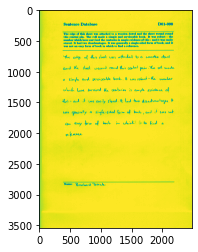

Line index=3961


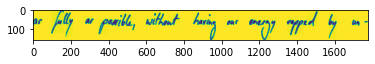

In [9]:
from numpy import random
from doctr.io import DocumentFile
from doctr.models import ocr_predictor
model = ocr_predictor(det_arch = 'db_resnet50', assume_straight_pages=True, preserve_aspect_ratio=True  ,
                      reco_arch = 'sar_resnet31', 
                      pretrained = True
                     )
import random
frmIndex=random.choice(range(forms.shape[0]))

frmIndexL=random.choice(range(lines.shape[0]))

img_pathF = forms['file'][frmIndex] #Specify your image path here
img_pathL = lines['file'][frmIndexL] #Specify your image path here
img_tmpF = DocumentFile.from_images(img_pathF)
img_tmpL = DocumentFile.from_images(img_pathL)
#normalization
imageF = cv2.imread(img_pathF, cv2.IMREAD_GRAYSCALE)
imageL = cv2.imread(img_pathL, cv2.IMREAD_GRAYSCALE)
model2 = ocr_predictor(det_arch = 'db_resnet50', 
                      reco_arch = 'crnn_vgg16_bn', 
                      pretrained = True
                     )
print(f"Form index={frmIndex}")
plt.imshow(imageF)
plt.show()
print(f"Line index={frmIndexL}")
plt.imshow(imageL)
plt.show()

In [10]:
from __future__ import print_function
import numpy as np

def valid_imshow_data(data):
    data = np.asarray(data)
    if data.ndim == 2:
        return True
    elif data.ndim == 3:
        if 3 <= data.shape[2] <= 4:
            return True
        else:
            print('The "data" has 3 dimensions but the last dimension '
                  'must have a length of 3 (RGB) or 4 (RGBA), not "{}".'
                  ''.format(data.shape[2]))
            return False
    else:
        print('To visualize an image the data must be 2 dimensional or '
              '3 dimensional, not "{}".'
              ''.format(data.ndim))
        return False

In [11]:
display(valid_imshow_data(imageF) , 
valid_imshow_data(imageL), 
np.asarray(imageF).shape)
#test=cv2.resize(img_tmpF, dsize = (-1,128,128,3))

True

True

(3542, 2479)

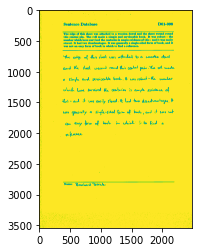

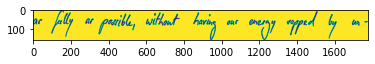

In [12]:

#filtre
filtreF = cv2.GaussianBlur(imageF,(3,3),0) #pour supprimer le bruit gaussien dans mon_image
edgesF = cv2.Canny(filtreF,100,200) #pour détecter les formes de mon_image
seuilF =  cv2.adaptiveThreshold(filtreF, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 15)
img_tmp1F=seuilF/255
plt.imshow(img_tmp1F)
plt.show()
filtreL = cv2.GaussianBlur(imageL,(3,3),0) #pour supprimer le bruit gaussien dans mon_image
edgesL = cv2.Canny(filtreL,100,200) #pour détecter les formes de mon_image
seuilL =  cv2.adaptiveThreshold(filtreL, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 15)
img_tmp1L=seuilL/255
plt.imshow(img_tmp1L)
plt.show()

In [13]:
resultL = model(img_tmpL)
resultF=model2(img_tmpF)
outputF = resultF.export()
outputL=resultL.export()
import json
with open("docTR_OCR_outputL.json", "w") as f:
    f.write(json.dumps(outputL, indent=1))
f.close()

import json
with open("docTR_OCR_outputF.json", "w") as f:
    f.write(json.dumps(outputF, indent=1))
f.close()

<Figure size 1080x1080 with 0 Axes>

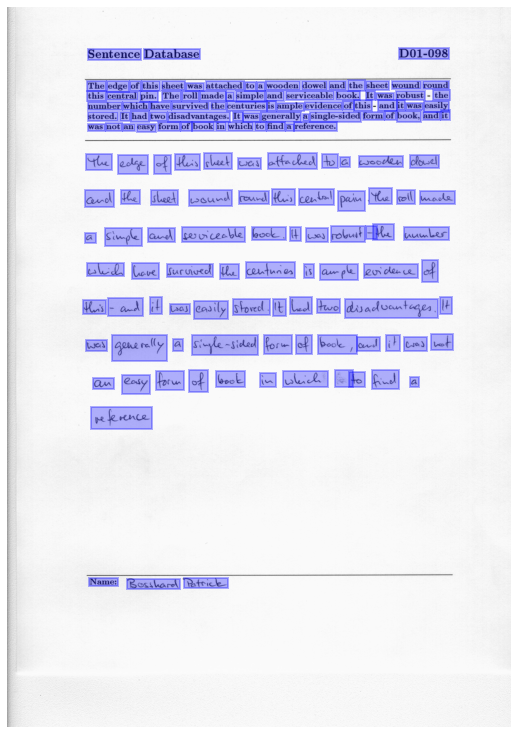

In [14]:
#Bounding Box Methode Database IHM
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
resultF.show(img_tmpF)


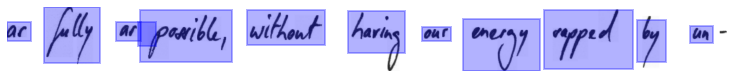

In [15]:
resultL.show(img_tmpL)

In [16]:
from google.colab.patches import cv2_imshow
def bounding_box_img(img,bbox):
  x_min, x_max,y_min, y_max = bbox
  #print(bbox)
  bbox_obj = img[y_min:y_max, x_min:x_max]
  return bbox_obj

#img = cv2.imread("image.jpg")
#bbox=[int(0.630859375*imageF.shape[1]), int(0.611328125*imageF.shape[0]), int(0.693359375*imageF.shape[1]), int(0.62890625*imageF.shape[0])]
#cropped_img = bounding_box_img(imageF,bbox)

#cv2_imshow(cropped_img)

In [17]:
import math
def convert_coordinates(geometry, output):
    page_dim = output['pages'][0]["dimensions"]
    len_x = page_dim[1]
    len_y = page_dim[0]
    (x_min, y_min) = geometry[0]
    (x_max, y_max) = geometry[1]
    x_min = math.floor(x_min * len_x)
    x_max = math.ceil(x_max * len_x)
    y_min = math.floor(y_min * len_y)
    y_max = math.ceil(y_max * len_y)
    return [x_min, x_max, y_min, y_max]
def get_coordinates(output,imageF):
    text = []
    page_dim = output['pages'][0]["dimensions"]
    text_coordinates = []
    test_img=[]
    for obj1 in output['pages'][0]["blocks"]:
        for obj2 in obj1["lines"]:
            for obj3 in obj2["words"]:
                          text.append(obj3["value"]) 
                          #bbox=[int(obj3["geometry"][0][0]*imageF.shape[1]),int(obj3["geometry"][1][0]*imageF.shape[1]), 
                          #int(obj3["geometry"][0][1]*imageF.shape[0]), int(obj3["geometry"][1][1]*imageF.shape[0])]                
                          converted_coordinates = convert_coordinates(
                                           obj3["geometry"],output
                                            )
                          print("{}: {}".format(converted_coordinates,
                                      obj3["value"]
                                     )
                                  )
                          #print(f"{bbox[0]},{bbox[1]},{bbox[2]},{bbox[3]}"  )
                          bbox=converted_coordinates
                          text_coordinates.append(converted_coordinates)
                          cropped_img = bounding_box_img(imageF,bbox)
                          filtreF = cv2.GaussianBlur(cropped_img,(3,3),0) #pour supprimer le bruit gaussien dans mon_image
                          seuilF =  cv2.adaptiveThreshold(filtreF, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 15)
                          test_img.append(seuilF)
                          cv2_imshow(seuilF)
    return text_coordinates,text,test_img

[397, 659, 207, 260]: Sentence


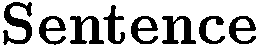

[673, 949, 207, 256]: Database


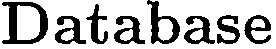

[1927, 2172, 204, 256]: D01-098


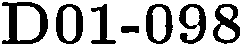

[392, 487, 363, 416]: The


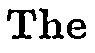

[491, 598, 366, 419]: edge


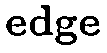

[605, 659, 366, 412]: of


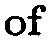

[660, 751, 363, 416]: this


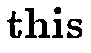

[760, 874, 366, 409]: sheet


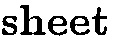

[881, 966, 373, 412]: was


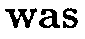

[978, 1163, 366, 409]: attached


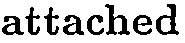

[1171, 1225, 370, 412]: to


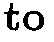

[1227, 1267, 370, 416]: a


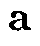

[1273, 1439, 366, 409]: wooden


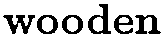

[1450, 1574, 366, 409]: dowel


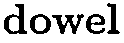

[1583, 1668, 366, 409]: and


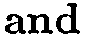

[1675, 1758, 359, 412]: the


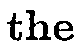

[1764, 1879, 366, 409]: sheet


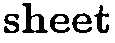

[1890, 2034, 366, 405]: wound


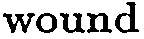

[2045, 2174, 366, 405]: round


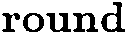

[392, 485, 411, 464]: this


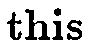

[491, 642, 418, 461]: central


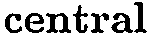

[651, 741, 415, 467]: pin.


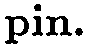

[760, 855, 411, 464]: The


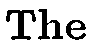

[859, 945, 411, 464]: roll


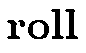

[948, 1075, 411, 464]: made


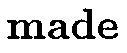

[1077, 1117, 418, 464]: a


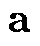

[1123, 1267, 415, 467]: simple


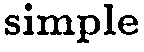

[1273, 1363, 411, 464]: and


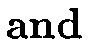

[1370, 1608, 411, 461]: serviceable


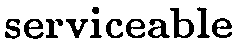

[1617, 1736, 415, 457]: book.


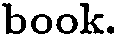

[1762, 1809, 411, 461]: It


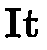

[1815, 1903, 421, 461]: was


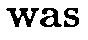

[1912, 2056, 415, 457]: robust


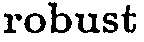

[2096, 2179, 408, 461]: the


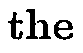

[394, 565, 466, 509]: number


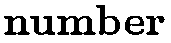

[568, 695, 466, 509]: which


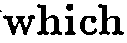

[702, 804, 466, 509]: have


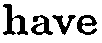

[811, 993, 466, 509]: survived


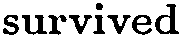

[999, 1075, 466, 509]: the


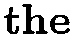

[1079, 1276, 463, 512]: centuries


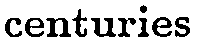

[1278, 1322, 463, 512]: is


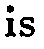

[1326, 1458, 470, 512]: ample


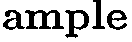

[1464, 1649, 466, 506]: evidence


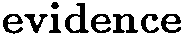

[1653, 1707, 463, 509]: of


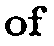

[1706, 1797, 460, 512]: this


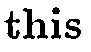

[1822, 1915, 460, 512]: and


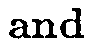

[1914, 1959, 460, 509]: it


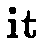

[1960, 2046, 470, 509]: was


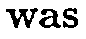

[2050, 2174, 463, 516]: easily


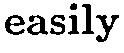

[397, 545, 518, 561]: stored.


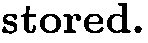

[556, 603, 515, 561]: It


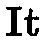

[607, 698, 511, 564]: had


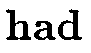

[699, 785, 518, 561]: two


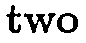

[789, 1097, 515, 568]: disadvantages.


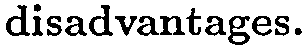

[1108, 1158, 515, 561]: It


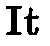

[1159, 1245, 522, 564]: was


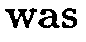

[1249, 1446, 515, 568]: generally


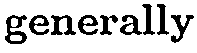

[1452, 1487, 525, 561]: a


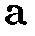

[1491, 1741, 515, 564]: single-sided


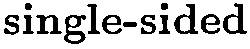

[1747, 1855, 515, 557]: form


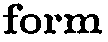

[1859, 1913, 511, 557]: of


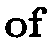

[1914, 2036, 511, 564]: book,


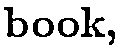

[2043, 2128, 515, 557]: and


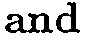

[2132, 2177, 508, 557]: it


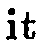

[387, 516, 722, 803]: Yhe


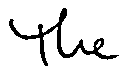

[544, 693, 729, 820]: eolge


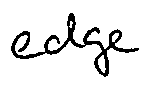

[723, 804, 726, 820]: of


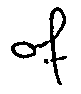

[825, 949, 722, 803]: Huis


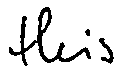

[968, 1107, 719, 800]: pheet


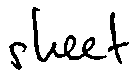

[1135, 1250, 743, 796]: Ces


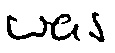

[1280, 1526, 719, 796]: otfached


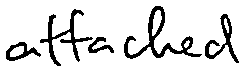

[1549, 1625, 722, 793]: to


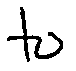

[1638, 1688, 740, 789]: C


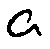

[1728, 1947, 733, 786]: woodlen


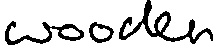

[1980, 2124, 726, 793]: dowel


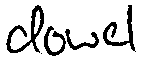

[380, 526, 902, 983]: Cerd


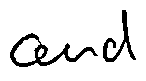

[559, 652, 899, 972]: te


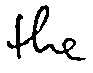

[709, 841, 899, 976]: sheet


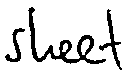

[895, 1104, 902, 979]: wound


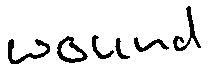

[1140, 1286, 906, 972]: rourd


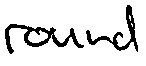

[1302, 1414, 895, 976]: Huis


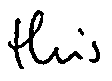

[1433, 1608, 895, 976]: cenlal


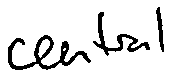

[1629, 1758, 906, 1004]: pain


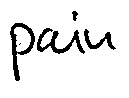

[1776, 1894, 892, 972]: Yie


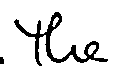

[1914, 2007, 899, 969]: foll


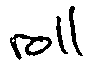

[2028, 2204, 906, 969]: madle


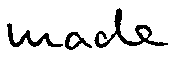

[382, 436, 1110, 1163]: a


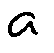

[479, 661, 1086, 1177]: Simple


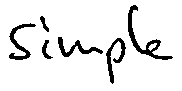

[692, 824, 1089, 1156]: auel


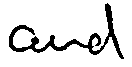

[861, 1170, 1082, 1156]: peviceable


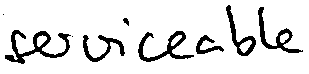

[1203, 1373, 1082, 1149]: book.


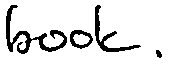

[1392, 1443, 1082, 1152]: (+


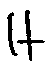

[1469, 1577, 1089, 1156]: way


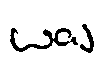

[1590, 1760, 1075, 1156]: robut


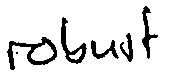

[1764, 1819, 1075, 1142]: -


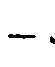

[1801, 1903, 1068, 1149]: He


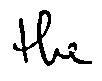

[1951, 2172, 1082, 1149]: mumber


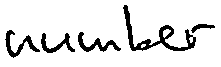

[392, 577, 1259, 1325]: uwdl


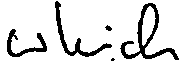

[612, 746, 1259, 1339]: Cicve


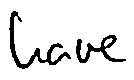

[786, 1012, 1262, 1329]: Survued


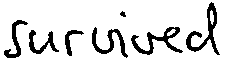

[1048, 1141, 1265, 1339]: Hhe


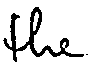

[1174, 1414, 1255, 1332]: ceutunes


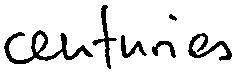

[1459, 1509, 1265, 1336]: is


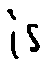

[1539, 1724, 1265, 1346]: ample


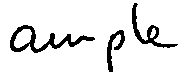

[1752, 2022, 1262, 1336]: eordence


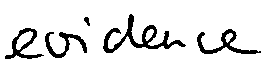

[2038, 2121, 1245, 1353]: of


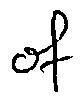

[372, 487, 1442, 1512]: Huis


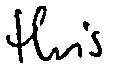

[493, 666, 1432, 1522]: -and


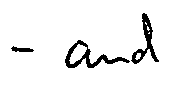

[699, 763, 1428, 1512]: it


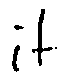

[798, 899, 1459, 1512]: Lsaj


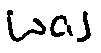

[917, 1085, 1445, 1536]: cosily


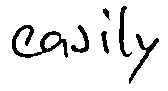

[1111, 1293, 1438, 1516]: stoved.


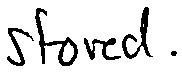

[1307, 1371, 1438, 1519]: It


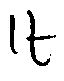

[1389, 1499, 1428, 1512]: bed


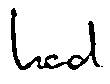

[1525, 1639, 1435, 1505]: two


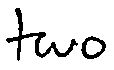

[1663, 2121, 1435, 1533]: diaduantages.


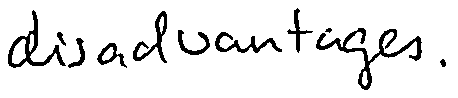

[2127, 2187, 1425, 1512]: l+


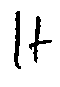

[384, 492, 1639, 1692]: Wcs


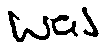

[515, 785, 1615, 1740]: geherelly


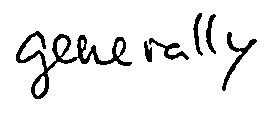

[813, 867, 1632, 1692]: a


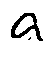

[910, 1235, 1615, 1713]: Siye-sided


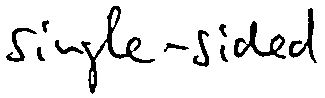

[1261, 1400, 1615, 1709]: forw


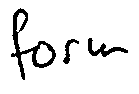

[1418, 1499, 1611, 1709]: of


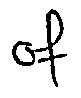

[1530, 1722, 1615, 1706]: book,


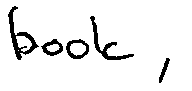

[1718, 1833, 1622, 1692]: curd


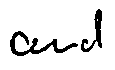

[1864, 1932, 1611, 1692]: il


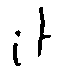

[1953, 2066, 1622, 1692]: Cyes


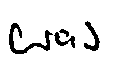

[2084, 2194, 1608, 1688]: tot


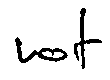

[421, 523, 1826, 1882]: an


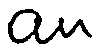

[564, 703, 1809, 1903]: losy


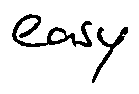

[731, 870, 1791, 1886]: forun


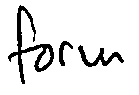

[895, 986, 1788, 1896]: of


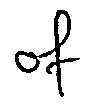

[1028, 1172, 1791, 1868]: boot


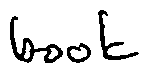

[1241, 1325, 1798, 1872]: in


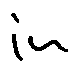

[1358, 1577, 1791, 1868]: ulicl


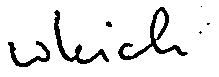

[1609, 1700, 1788, 1872]: a


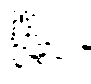

[1682, 1758, 1795, 1868]: to


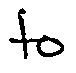

[1793, 1925, 1788, 1882]: fiudl


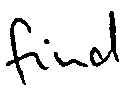

[1980, 2027, 1822, 1872]: a


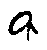

[394, 480, 574, 613]: was


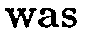

[484, 565, 570, 613]: not


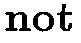

[571, 628, 577, 609]: an


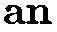

[636, 734, 574, 616]: easy


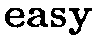

[743, 848, 567, 609]: form


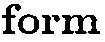

[854, 908, 567, 613]: of


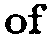

[910, 1020, 567, 609]: book


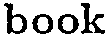

[1026, 1078, 567, 609]: in


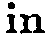

[1084, 1211, 567, 609]: which


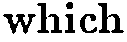

[1217, 1271, 567, 609]: to


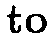

[1278, 1366, 567, 609]: find


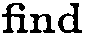

[1370, 1409, 574, 613]: a


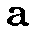

[1408, 1623, 563, 613]: reference.


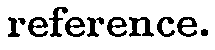

[411, 715, 1968, 2079]: rekrnce


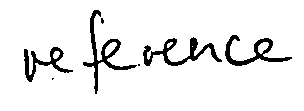

[404, 545, 2808, 2851]: Name:


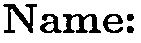

[588, 850, 2812, 2865]: Bossharel


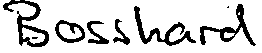

[869, 1085, 2808, 2861]: Patrice


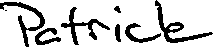

In [18]:
graphical_coordinates = get_coordinates(outputF,imageF)

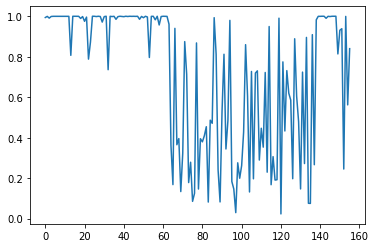

In [19]:
#Evolution Confidence / mot trouvé dans l'ordre (normalement trou lorsque l'on est sur mot manuscrit)
confidence=[]
for obj1 in outputF['pages'][0]["blocks"]:
    for obj2 in obj1["lines"]:
        for obj3 in obj2["words"]:
          confidence.append(obj3['confidence'])

plt.plot(range(0,len(confidence)),confidence)

In [20]:
import PIL
from PIL import ImageDraw
import matplotlib.pyplot as plt
def draw_bounds(imageF, bound):
    draw = ImageDraw.Draw(imageF)
    for b in bound:
        p0, p1, p2, p3 = [b[0],b[2]], [b[1],b[2]], \
                         [b[1],b[3]], [b[0],b[3]]
        draw.line([*p0,*p1,*p2,*p3,*p0], fill='blue', width=2)
    return image

d01-098


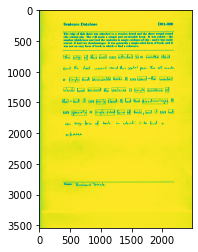

In [21]:
#Afficher formes avec bounding boxes de la base IHM versus celles trouvées par Doctr
#Chercher référence form
print(forms['form_id'][frmIndex])
words['form_id']=words['word_id'].apply(lambda x: x[:-6])
#récupération des coordonnées avec ajustement
#on recalcule le min / max grace au width et height du fichier
words['xmin']=words['x'].astype(int)
words['xmax']=words[['x','w']].astype(int).sum(axis=1)
words['ymin']= words[['y','h']].astype(int).sum(axis=1)
words['ymax']=words['y'].astype(int)
words[['x','y','w','h','xmax','ymax','xmin','ymin']]
#selection dans Words les records relatifs à cette form words
_selectW=words.loc[words['form_id']==forms['form_id'][frmIndex]].reset_index(drop=True)
#display(_selectW.head())

bbox=[]
for row in range(_selectW.shape[0]):
  #print(row)
  xmin=_selectW.loc[row,['xmin']][0]
  xmax=_selectW.loc[row,['xmax']][0]
  ymin=_selectW.loc[row,['ymin']][0]
  ymax=_selectW.loc[row,['ymax']][0]
  bbox.append([xmin, xmax, ymin, ymax])
#print(bbox)
image = PIL.Image.open(img_pathF)
result_image = draw_bounds(image, bbox)
#plt.imshow(cv2.resize(result_image, dsize = (1000,1000)))
plt.imshow(result_image)

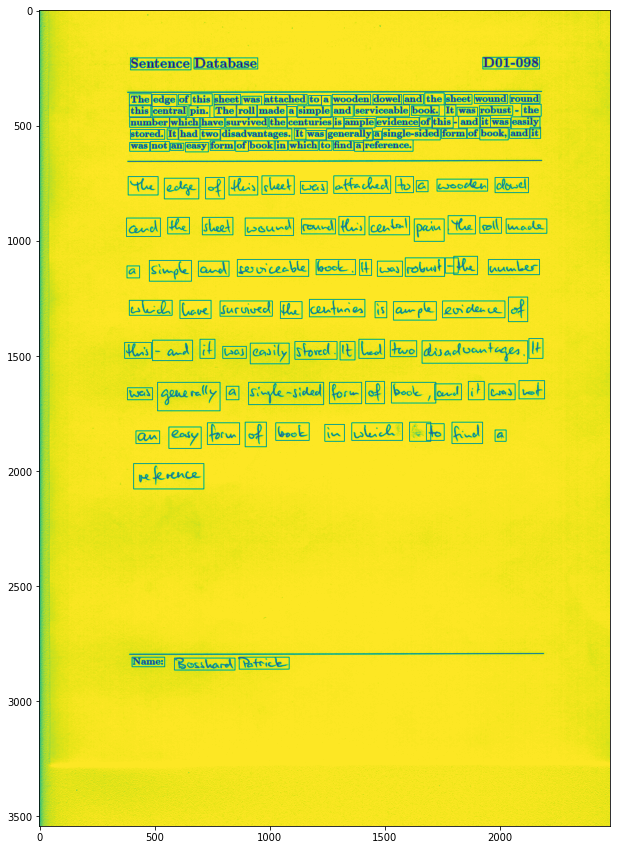

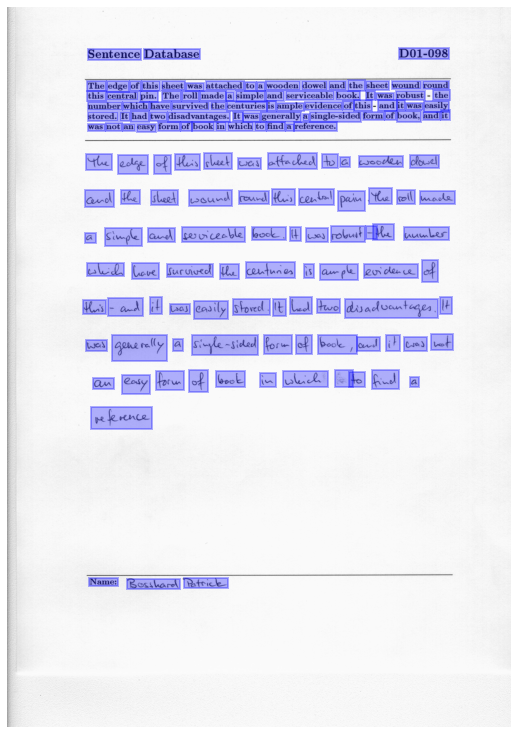

In [22]:
#Bounding Box Methode Database IHM
image = PIL.Image.open(img_pathF)
result_image = draw_bounds(image, graphical_coordinates[0])
plt.figure(figsize=(15,15))
plt.imshow(result_image)
resultF.show(img_tmpF)

0


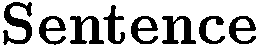

1


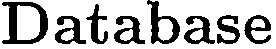

2


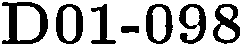

3


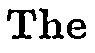

4


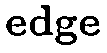

5


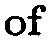

6


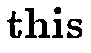

7


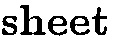

8


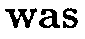

9


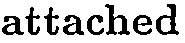

10


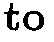

11


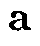

12


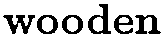

13


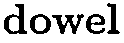

14


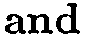

15


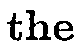

16


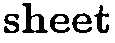

17


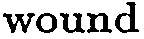

18


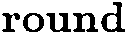

19


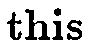

20


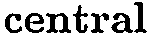

21


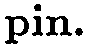

22


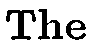

23


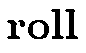

24


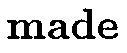

25


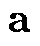

26


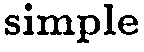

27


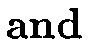

28


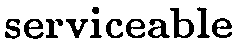

29


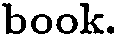

30


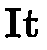

31


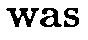

32


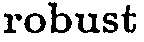

33


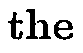

34


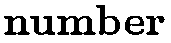

35


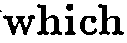

36


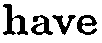

37


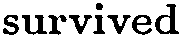

38


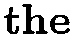

39


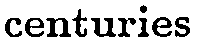

40


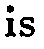

41


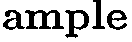

42


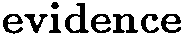

43


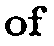

44


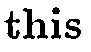

45


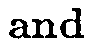

46


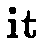

47


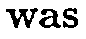

48


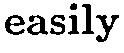

49


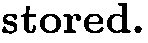

50


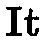

51


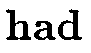

52


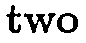

53


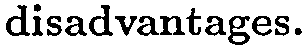

54


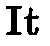

55


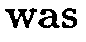

56


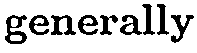

57


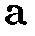

58


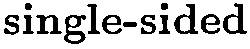

59


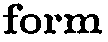

60


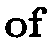

61


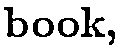

62


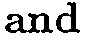

63


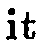

64


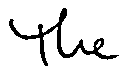

65


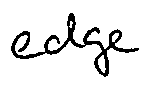

66


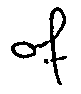

67


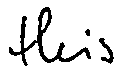

68


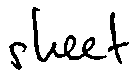

69


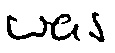

70


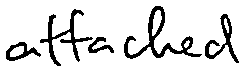

71


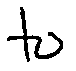

72


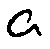

73


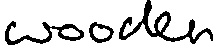

74


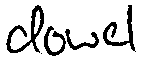

75


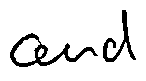

76


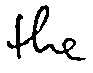

77


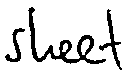

78


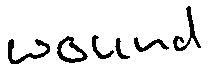

79


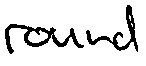

80


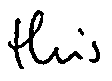

81


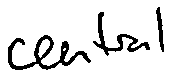

82


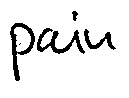

83


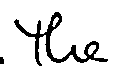

84


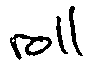

85


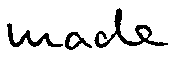

86


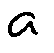

87


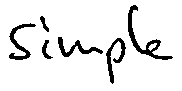

88


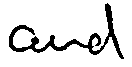

89


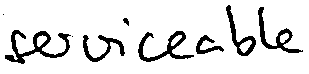

90


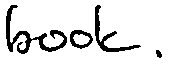

91


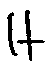

92


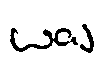

93


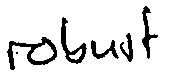

94


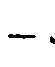

95


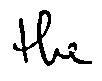

96


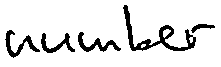

97


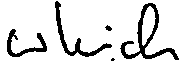

98


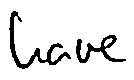

99


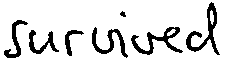

100


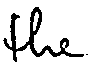

101


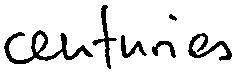

102


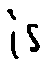

103


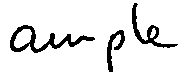

104


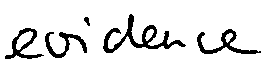

105


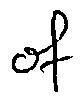

106


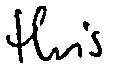

107


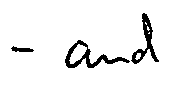

108


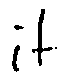

109


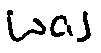

110


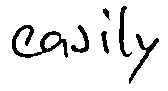

111


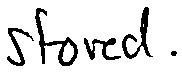

112


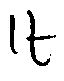

113


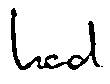

114


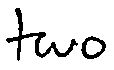

115


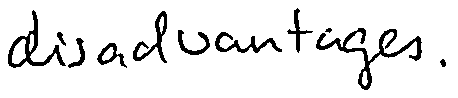

116


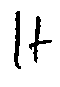

117


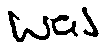

118


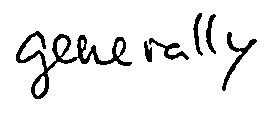

119


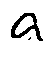

120


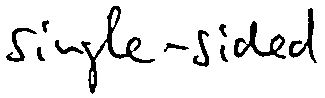

121


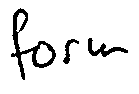

122


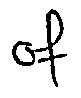

123


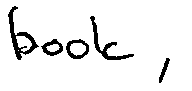

124


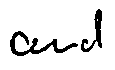

125


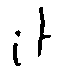

126


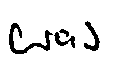

127


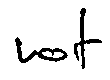

128


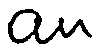

129


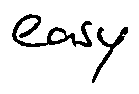

130


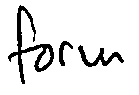

131


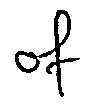

132


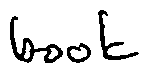

133


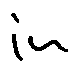

134


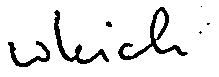

135


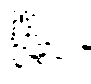

136


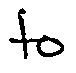

137


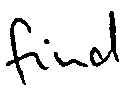

138


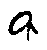

139


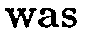

140


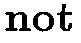

141


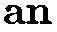

142


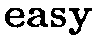

143


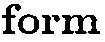

144


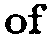

145


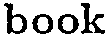

146


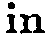

147


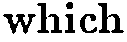

148


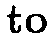

149


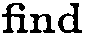

150


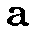

151


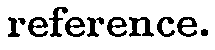

152


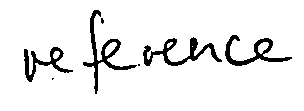

153


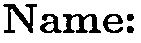

154


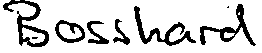

155


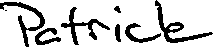

In [23]:
#Test modele reconnaissance mot détecté par methode OCR
#test_img : liste des images isolées depuis DocTR
test_img=graphical_coordinates[2:]
for imgset in graphical_coordinates[2:]:
  for ind,img in enumerate(imgset):
    print(ind)
    cv2_imshow(img)
  


